In [256]:
print('vishal megamart guard prep')

vishal megamart guard prep


In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Dataset.csv')
df.head()

,school,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,Dalc,health,absences,G1,G2,G3,Feature_1,Feature_2,Feature_3,romantic
0,GP,F,U,GT3,A,4,4.0,at_home,teacher,course,...,1,3,4.0,0,11.0,11,18.0,2.0,1.0,no
1,GP,F,U,GT3,T,1,1.0,at_home,other,course,...,1,3,2.0,9,11.0,11,17.0,2.0,1.0,no
2,GP,F,U,LE3,T,1,1.0,at_home,other,other,...,2,3,6.0,12,13.0,12,15.0,NaN,3.0,no
3,GP,F,U,GT3,T,4,2.0,health,services,home,...,1,5,0.0,14,14.0,14,15.0,3.0,1.0,yes
4,GP,F,U,GT3,T,3,3.0,other,other,home,...,1,5,0.0,11,13.0,13,16.0,NaN,2.0,no


Data cleaning and Encoding

Encoding 

In [258]:
df.select_dtypes(include='object').columns

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

In [259]:
n = 120
mx = 0
while (n!=0):
    arr = np.random.permutation(5)
    codes = {'teacher':arr[0],'health':arr[1],'services':arr[2],'at_home':arr[3],'other':arr[4]}
    df['codes'] = df['Mjob'].map(codes)
    corr = ( df['Medu'].corr( df['codes']))
    if(corr>mx):
        mx = corr
        print(arr,corr) 
    n=n-1

[4 3 2 0 1] 0.6301707414562094


In [260]:
n = 120
mx = 0
while (n!=0):
    arr = np.random.permutation(5)
    codes = {'teacher':arr[0],'health':arr[1],'services':arr[2],'at_home':arr[3],'other':arr[4]}
    df['codes'] = df['Fjob'].map(codes)
    corr = ( df['Fedu'].corr( df['codes']))
    if(corr>mx):
        mx = corr
        print(arr,corr) 
    n=n-1

[1 4 3 0 2] 0.0913321482703649
[4 3 2 1 0] 0.3588588106399968
[4 3 2 0 1] 0.41013096410190863


In [261]:
df['famsize']=df['famsize'].replace({'GT3': 1, 'LE3': 0})
df['Mjob']=df['Mjob'].replace({'teacher': 4, 'health': 3, 'services': 2, 'at_home': 0, 'other': 1})
df['Fjob']=df['Fjob'].replace({'teacher': 4, 'health': 3, 'services': 2, 'at_home': 0, 'other': 1})
df['reason']=df['reason'].replace({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
df['guardian']=df['guardian'].replace({'mother': 1, 'father': 2, 'other': 0})
df['higher']=df['higher'].replace({'yes': 1, 'no': 0})


C:\Users\madha\AppData\Local\Temp\ipykernel_25340\2954908513.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['famsize']=df['famsize'].replace({'GT3': 1, 'LE3': 0})
C:\Users\madha\AppData\Local\Temp\ipykernel_25340\2954908513.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Mjob']=df['Mjob'].replace({'teacher': 4, 'health': 3, 'services': 2, 'at_home': 0, 'other': 1})
C:\Users\madha\AppData\Local\Temp\ipykernel_25340\2954908513.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in

In [262]:
for col in df.columns:
    if df[col].isna().any():
        print(col, df[col].isna().sum())
      

famsize 50
Fedu 73
traveltime 73
higher 76
freetime 45
absences 69
G2 35
Feature_1 38
Feature_2 46
Feature_3 39


In [263]:
from sklearn.preprocessing import LabelEncoder





le = LabelEncoder()


for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


print(df.dtypes)

school          int64
sex             int64
address         int64
famsize       float64
Pstatus         int64
Medu            int64
Fedu          float64
Mjob            int64
Fjob            int64
reason          int64
guardian        int64
traveltime    float64
failures        int64
schoolsup       int64
famsup          int64
paid            int64
activities      int64
nursery         int64
higher        float64
internet        int64
famrel          int64
freetime      float64
goout           int64
Dalc            int64
health          int64
absences      float64
G1              int64
G2            float64
G3              int64
Feature_1     float64
Feature_2     float64
Feature_3     float64
romantic        int64
codes           int32
dtype: object


In [264]:
df_dropped = df.dropna().copy()

In [265]:
df['freetime'].value_counts(normalize=True)

freetime
3.0    0.387417
4.0    0.278146
2.0    0.165563
5.0    0.099338
1.0    0.069536
Name: proportion, dtype: float64

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['famsize'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['famsize'].sort_values(ascending=False)
top_5_features = correlations.drop('famsize').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['famsize']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)


Top 5 features: ['Pstatus', 'sex', 'nursery', 'address', 'schoolsup']
Accuracy: 0.6916666666666667


In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['Fedu'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['Fedu'].sort_values(ascending=False)
top_5_features = correlations.drop('Fedu').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['Fedu']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['Medu', 'Fjob', 'Mjob', 'G3', 'G1']
Accuracy: 0.47413793103448276


In [268]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['traveltime'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['traveltime'].sort_values(ascending=False)
top_5_features = correlations.drop('traveltime').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['traveltime']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['address', 'Medu', 'school', 'Mjob', 'internet']
Accuracy: 0.5603448275862069


In [269]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['higher'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['higher'].sort_values(ascending=False)
top_5_features = correlations.drop('higher').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['higher']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)


Top 5 features: ['G1', 'G3', 'failures', 'Medu', 'Mjob']
Accuracy: 0.9043478260869565


In [270]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['freetime'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['freetime'].sort_values(ascending=False)
top_5_features = correlations.drop('freetime').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['freetime']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['goout', 'activities', 'sex', 'famrel', 'Dalc']
Accuracy: 0.4793388429752066


In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df_clean = df.dropna(subset=['absences'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()
top_5_features = correlations['absences'].drop('absences').sort_values(ascending=False).head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['absences']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy (R² score):", accuracy)


Top 5 features: ['Dalc', 'G1', 'school', 'guardian', 'G3']
Accuracy (R² score): 0.09439333399889316


In [272]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df_clean = df.dropna(subset=['G2'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()
top_5_features = correlations['G2'].drop('G2').sort_values(ascending=False).head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['G2']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy (R² score):", accuracy)


Top 5 features: ['G3', 'G1', 'failures', 'Medu', 'school']
Accuracy (R² score): 0.8887173906530605


In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['Feature_1'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['Feature_1'].sort_values(ascending=False)
top_5_features = correlations.drop('Feature_1').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['Feature_1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['failures', 'guardian', 'G1', 'romantic', 'schoolsup']
Accuracy: 0.3170731707317073


In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['Feature_2'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['Feature_2'].sort_values(ascending=False)
top_5_features = correlations.drop('Feature_2').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['Feature_2']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['G1', 'G3', 'sex', 'Dalc', 'failures']
Accuracy: 0.47107438016528924


In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df_clean = df.dropna(subset=['Feature_3'])
df_clean = df_clean.dropna(axis=1)

correlations = df_clean.corr().abs()['Feature_3'].sort_values(ascending=False)
top_5_features = correlations.drop('Feature_3').head(5).index.tolist()

X = df_clean[top_5_features]
y = df_clean['Feature_3']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Top 5 features:", top_5_features)
print("Accuracy:", accuracy)



Top 5 features: ['Dalc', 'goout', 'sex', 'G3', 'G1']
Accuracy: 0.48360655737704916


In [276]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

columns = ['famsize', 'Fedu', 'traveltime', 'freetime', 'absences',
           'G2', 'Feature_1', 'Feature_2', 'Feature_3', 'higher']

df_clean = df[columns].dropna().copy()

for target in columns:
    corr = df_clean.corr().abs()[target].sort_values(ascending=False)
    top_5_features = corr.drop(target).head(5).index.tolist()
    
    X = df_clean[top_5_features].copy()
    y = df_clean[target].copy()
    
    if y.nunique() > 10 and y.dtype == 'float':
        print(f"Skipping {target} (likely continuous).")
        continue
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42)
    
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Target: {target}")
    print(f"Top 5 features: {top_5_features}")
    print(f"KNN Accuracy: {accuracy:.2f}\n")



Target: famsize
Top 5 features: ['Feature_1', 'traveltime', 'higher', 'Feature_3', 'G2']
KNN Accuracy: 0.58

Target: Fedu
Top 5 features: ['traveltime', 'G2', 'higher', 'Feature_1', 'Feature_2']
KNN Accuracy: 0.21

Target: traveltime
Top 5 features: ['Fedu', 'G2', 'higher', 'Feature_2', 'famsize']
KNN Accuracy: 0.51

Target: freetime
Top 5 features: ['Feature_3', 'Feature_2', 'Feature_1', 'Fedu', 'G2']
KNN Accuracy: 0.26

Skipping absences (likely continuous).
Skipping G2 (likely continuous).
Target: Feature_1
Top 5 features: ['higher', 'Fedu', 'absences', 'famsize', 'G2']
KNN Accuracy: 0.34

Target: Feature_2
Top 5 features: ['G2', 'higher', 'Feature_3', 'absences', 'traveltime']
KNN Accuracy: 0.42

Target: Feature_3
Top 5 features: ['Feature_2', 'freetime', 'absences', 'higher', 'G2']
KNN Accuracy: 0.36

Target: higher
Top 5 features: ['G2', 'Feature_2', 'absences', 'Feature_1', 'Fedu']
KNN Accuracy: 0.85



In [277]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

def predictive_impute(df, target_col, model_type='logistic', round_output=False):
    df_copy = df.copy()
    correlations = df_copy.corr(numeric_only=True)[target_col].drop(target_col).abs()
    non_nan_features = df_copy.columns[df_copy.notna().all()].tolist()
    top_5_features = correlations[correlations.index.isin(non_nan_features)].sort_values(ascending=False).head(5).index.tolist()

    print(f"\n▶ Imputing '{target_col}' using top 5 features: {top_5_features}")
    known = df_copy[df_copy[target_col].notna()]
    unknown = df_copy[df_copy[target_col].isna()]
    if unknown.empty:
        print(f"✅ No missing values in '{target_col}'")
        return df_copy
    X_known = known[top_5_features]
    y_known = known[target_col]
    X_unknown = unknown[top_5_features]
    scaler = StandardScaler()
    X_known_scaled = scaler.fit_transform(X_known)
    X_unknown_scaled = scaler.transform(X_unknown)
    if model_type == 'logistic':
        model = LogisticRegression(max_iter=1000)
    elif model_type == 'linear':
        model = LinearRegression()
    else:
        raise ValueError("model_type must be 'logistic' or 'linear'")
    model.fit(X_known_scaled, y_known)
    predictions = model.predict(X_unknown_scaled)
    if round_output:
        predictions = np.round(predictions).astype(int)
    df.loc[df[target_col].isna(), target_col] = predictions
    print(f"✅ Imputed {len(predictions)} missing values in '{target_col}'")
    return df

df = predictive_impute(df, 'famsize', model_type='logistic')
df = predictive_impute(df, 'traveltime', model_type='logistic')
df = predictive_impute(df, 'Fedu', model_type='logistic')
df = predictive_impute(df, 'Feature_3', model_type='logistic')
df = predictive_impute(df, 'higher', model_type='logistic')
df = predictive_impute(df, 'Feature_2', model_type='logistic')
df = predictive_impute(df, 'freetime', model_type='logistic')
df = predictive_impute(df, 'G2', model_type='linear', round_output=True)

print("\n🔍 Missing values after imputation:")
print(df[['famsize', 'traveltime', 'higher', 'Feature_2', 'freetime', 'Fedu', 'Feature_3', 'G2']].isna().sum())






▶ Imputing 'famsize' using top 5 features: ['Pstatus', 'sex', 'nursery', 'address', 'schoolsup']
✅ Imputed 50 missing values in 'famsize'

▶ Imputing 'traveltime' using top 5 features: ['address', 'Medu', 'school', 'Mjob', 'internet']
✅ Imputed 73 missing values in 'traveltime'

▶ Imputing 'Fedu' using top 5 features: ['Medu', 'Fjob', 'Mjob', 'G3', 'G1']
✅ Imputed 73 missing values in 'Fedu'

▶ Imputing 'Feature_3' using top 5 features: ['Dalc', 'goout', 'sex', 'G3', 'G1']
✅ Imputed 39 missing values in 'Feature_3'

▶ Imputing 'higher' using top 5 features: ['G1', 'G3', 'failures', 'Medu', 'Fedu']
✅ Imputed 76 missing values in 'higher'

▶ Imputing 'Feature_2' using top 5 features: ['G1', 'G3', 'sex', 'Feature_3', 'higher']
✅ Imputed 46 missing values in 'Feature_2'

▶ Imputing 'freetime' using top 5 features: ['goout', 'Feature_3', 'activities', 'sex', 'famrel']
✅ Imputed 45 missing values in 'freetime'

▶ Imputing 'G2' using top 5 features: ['G3', 'G1', 'failures', 'higher', 'Medu']

In [278]:
def mode_impute(df, column):
    mode_val = df[column].mode()[0]
    num_missing = df[column].isna().sum()
    df[column].fillna(mode_val, inplace=True)
    print(f"✅ Imputed {num_missing} missing values in '{column}' with mode: {mode_val}")

for col in ['Feature_1', 'absences']:
    mode_impute(df, col)

print("\n🔍 Missing values remaining:")
print(df[['Feature_1', 'absences']].isna().sum())



✅ Imputed 38 missing values in 'Feature_1' with mode: 17.0
✅ Imputed 69 missing values in 'absences' with mode: 0.0

🔍 Missing values remaining:
Feature_1    0
absences     0
dtype: int64


C:\Users\madha\AppData\Local\Temp\ipykernel_25340\374707488.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_val, inplace=True)


In [279]:
cols_with_na = df.columns[df.isna().any()].tolist()
print("Columns with missing values:", cols_with_na)

Columns with missing values: []


In [280]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import xgboost

# Sample DataFrame (replace this with your own data source)
data =df.copy()  # Use the cleaned DataFrame
data.dropna(inplace=True)  # Ensure no missing values
# Use only one column as the feature
X = data.drop(columns=['romantic']) # double brackets to keep it as DataFrame
y = data['romantic']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5846153846153846
Classification report:
              precision    recall  f1-score   support

           0       0.66      0.69      0.67        81
           1       0.44      0.41      0.43        49

    accuracy                           0.58       130
   macro avg       0.55      0.55      0.55       130
weighted avg       0.58      0.58      0.58       130



C:\Users\madha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [01:36:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Predicting Features

Feature 1

In [281]:

correlations = df.corr(numeric_only=True)['Feature_1'].drop('Feature_1')


top_10_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index).head(10)


print("Top 10 features most correlated with 'Feature_1' (with sign):")
print(top_10_correlations)


Top 10 features most correlated with 'Feature_1' (with sign):
failures     0.297461
guardian    -0.270119
higher      -0.239656
romantic     0.177722
schoolsup   -0.174057
G1          -0.173833
Dalc         0.164249
Fedu        -0.137351
Mjob        -0.120908
Feature_3    0.113681
Name: Feature_1, dtype: float64


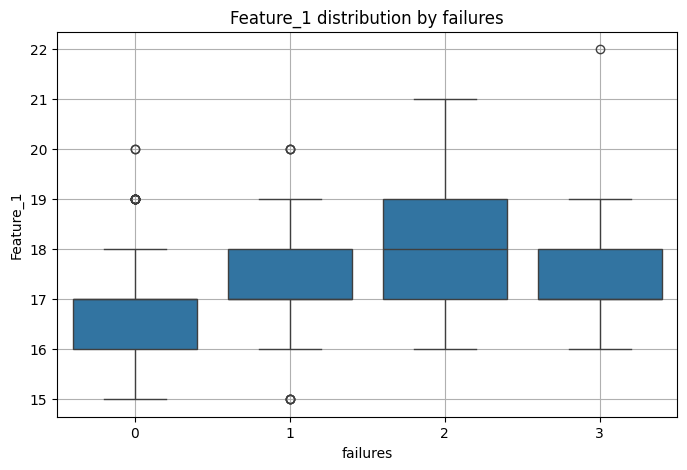

In [282]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='failures', y='Feature_1', data=df)

plt.title('Feature_1 distribution by failures')
plt.xlabel('failures')
plt.ylabel('Feature_1')
plt.grid(True)
plt.show()


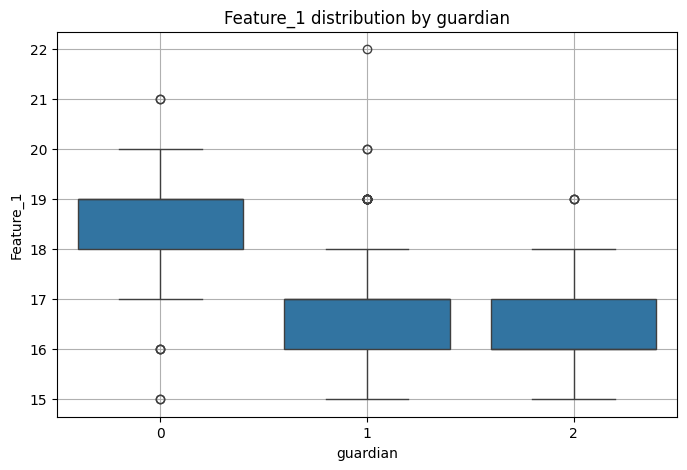

In [283]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='guardian', y='Feature_1', data=df)

plt.title('Feature_1 distribution by guardian')
plt.xlabel('guardian')
plt.ylabel('Feature_1')
plt.grid(True)
plt.show()


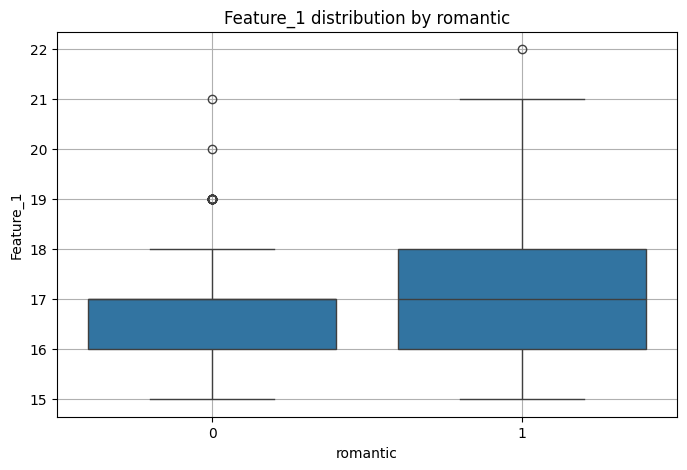

In [284]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='romantic', y='Feature_1', data=df)

plt.title('Feature_1 distribution by romantic')
plt.xlabel('romantic')
plt.ylabel('Feature_1')
plt.grid(True)
plt.show()


Feature 2

In [285]:

correlations = df.corr(numeric_only=True)['Feature_2'].drop('Feature_2')


top_10_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index).head(10)


print("Top 10 features most correlated with 'Feature_2' (with sign):")
print(top_10_correlations)

Top 10 features most correlated with 'Feature_2' (with sign):
G1           0.265892
G3           0.261420
G2           0.254177
sex         -0.209191
Feature_3   -0.205332
higher       0.200479
failures    -0.154502
Dalc        -0.149692
school      -0.134241
famsup       0.134175
Name: Feature_2, dtype: float64


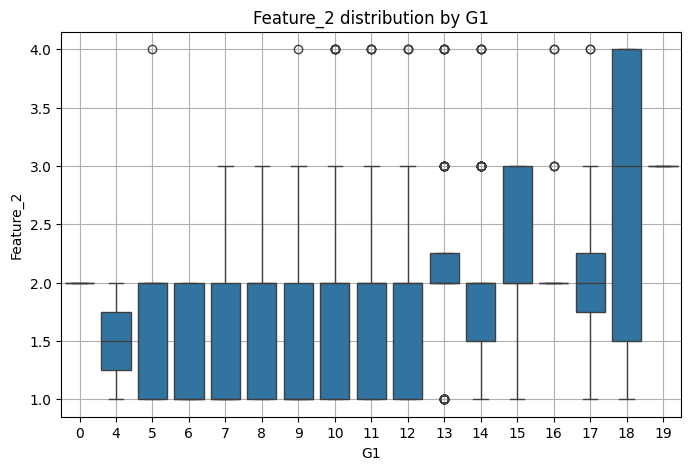

In [286]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='G1', y='Feature_2', data=df)

plt.title('Feature_2 distribution by G1')
plt.xlabel('G1')
plt.ylabel('Feature_2')
plt.grid(True)
plt.show()


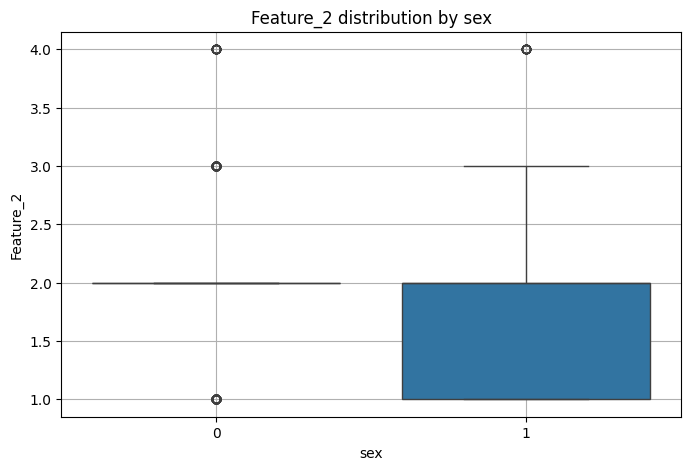

In [287]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='Feature_2', data=df)

plt.title('Feature_2 distribution by sex')
plt.xlabel('sex')
plt.ylabel('Feature_2')
plt.grid(True)
plt.show()


Feature 3

In [288]:

correlations = df.corr(numeric_only=True)['Feature_3'].drop('Feature_3')


top_10_correlations = correlations.reindex(correlations.abs().sort_values(ascending=False).index).head(10)


print("Top 10 features most correlated with 'Feature_3' (with sign):")
print(top_10_correlations)

Top 10 features most correlated with 'Feature_3' (with sign):
Dalc         0.633593
goout        0.385739
sex          0.333451
Feature_2   -0.205332
G3          -0.176277
G2          -0.166581
freetime     0.154678
G1          -0.152832
absences     0.121839
health       0.117522
Name: Feature_3, dtype: float64


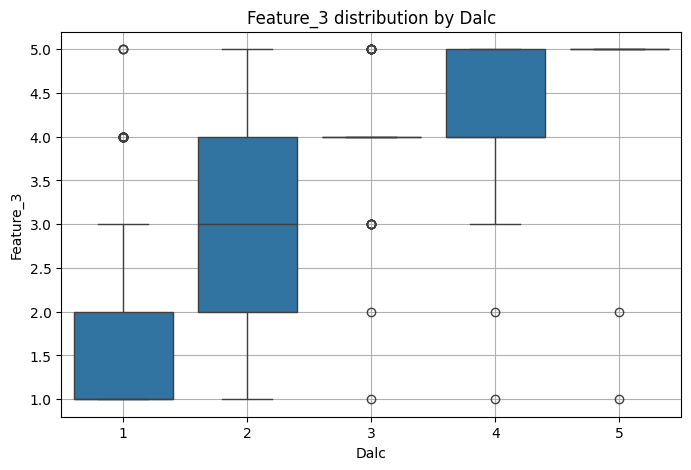

In [289]:

plt.figure(figsize=(8, 5))
sns.boxplot(x='Dalc', y='Feature_3', data=df)

plt.title('Feature_3 distribution by Dalc')
plt.xlabel('Dalc')
plt.ylabel('Feature_3')
plt.grid(True)
plt.show()

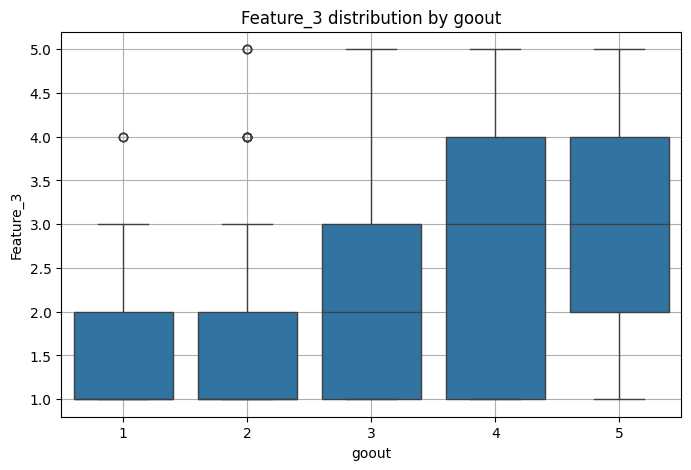

In [290]:


plt.figure(figsize=(8, 5))
sns.boxplot(x='goout', y='Feature_3', data=df)

plt.title('Feature_3 distribution by goout')
plt.xlabel('goout')
plt.ylabel('Feature_3')
plt.grid(True)
plt.show()


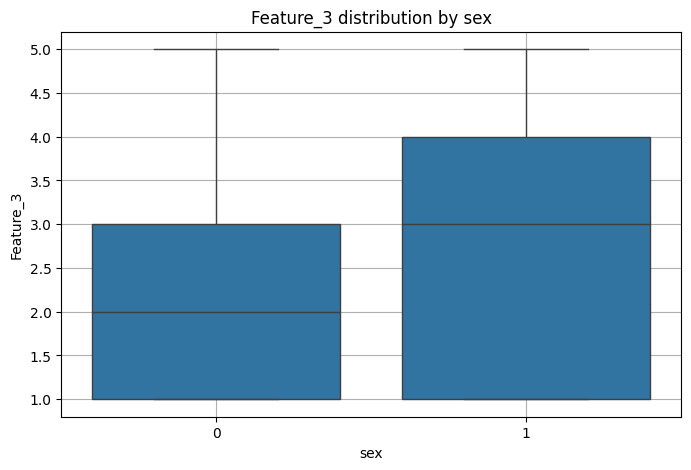

In [291]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='Feature_3', data=df)

plt.title('Feature_3 distribution by sex')
plt.xlabel('sex')
plt.ylabel('Feature_3')
plt.grid(True)
plt.show()


*EDA*

*1. Question*: Does the student’s school (GP vs. MS) correlate with final grades (G3)?  
*Plot: **Bar Chart*** (Average G3 by school).  
*Insight*: Compare academic performance across schools to identify potential institutional disparities.  


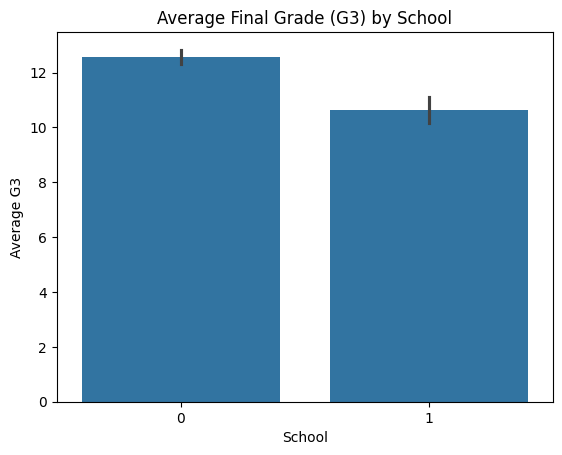

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='school', y='G3')
plt.title('Average Final Grade (G3) by School')
plt.xlabel('School')
plt.ylabel('Average G3')
plt.show()


*2. Question*: How does weekday alcohol consumption (Dalc) relate to health status?  
*Plot: **Violin Plot*** (Dalc vs. health).  
*Insight*: Explore if higher alcohol use correlates with poorer self-reported health.  


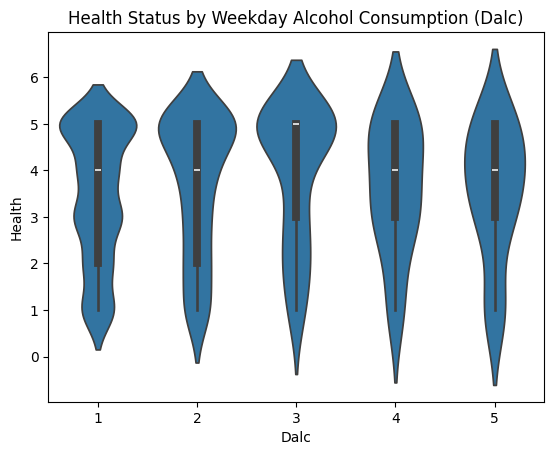

In [293]:
sns.violinplot(data=df, x='Dalc', y='health')
plt.title('Health Status by Weekday Alcohol Consumption (Dalc)')
plt.xlabel('Dalc')
plt.ylabel('Health')
plt.show()


*3. Question*: Are urban students more likely to have shorter travel times than rural students?  
*Plot: **Stacked Bar Chart*** (Traveltime distribution by address type).  
*Insight*: Highlight infrastructure or accessibility differences between urban/rural areas.  


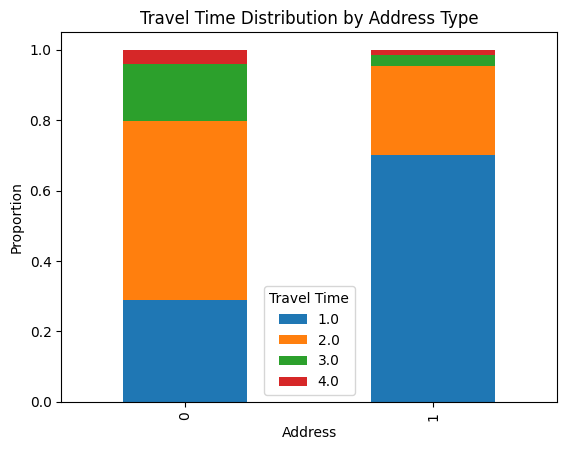

In [294]:
pd.crosstab(df['address'], df['traveltime'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Travel Time Distribution by Address Type')
plt.xlabel('Address')
plt.ylabel('Proportion')
plt.legend(title='Travel Time')
plt.show()


*4. Question*: Does maternal education level (Medu) influence student grades (G3)?  
*Plot: **Scatter Plot*** (Medu vs. G3, colored by sex).  
*Insight*: Identify if parental education correlates with academic success and if gender plays a role.  


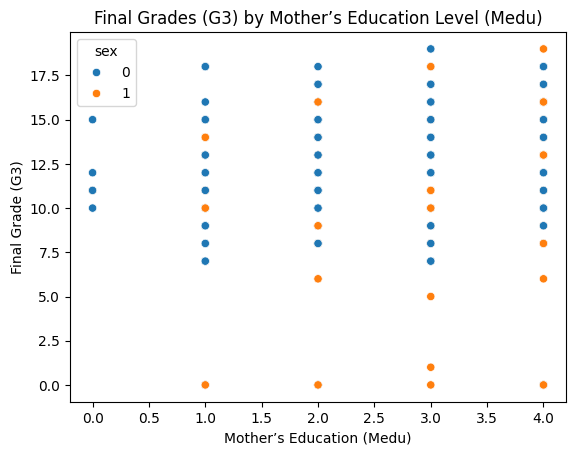

In [295]:
sns.scatterplot(data=df, x='Medu', y='G3', hue='sex')
plt.title('Final Grades (G3) by Mother’s Education Level (Medu)')
plt.xlabel('Mother’s Education (Medu)')
plt.ylabel('Final Grade (G3)')
plt.show()


*5. Question*: Are students with family support (famsup) less likely to have past failures?  
*Plot: **Grouped Bar Chart*** (Failures count by famsup status).  
*Insight*: Assess the impact of family support on academic resilience.  


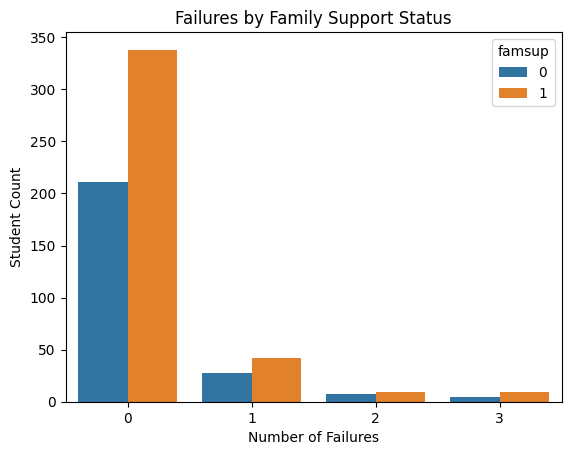

In [296]:
sns.countplot(data=df, x='failures', hue='famsup')
plt.title('Failures by Family Support Status')
plt.xlabel('Number of Failures')
plt.ylabel('Student Count')
plt.show()


*6. Question*: Do students aspiring for higher education (higher) have better internet access?  
*Plot: **Heatmap*** (Higher education vs. internet access).  
*Insight*: Investigate socioeconomic factors affecting educational aspirations.  


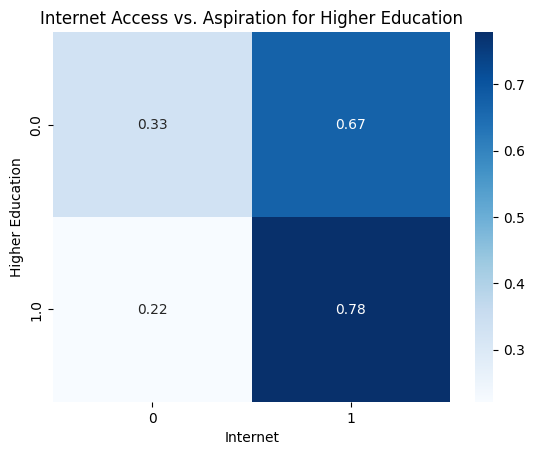

In [297]:
sns.heatmap(pd.crosstab(df['higher'], df['internet'], normalize='index'), annot=True, cmap='Blues')
plt.title('Internet Access vs. Aspiration for Higher Education')
plt.xlabel('Internet')
plt.ylabel('Higher Education')
plt.show()


*7. Question*: How does free time (freetime) correlate with study habits (e.g., absences or G3)?  
*Plot: **Scatter Plot*** (Freetime vs. G3, sized by absences).  
*Insight*: Determine if leisure time impacts academic performance or attendance.  


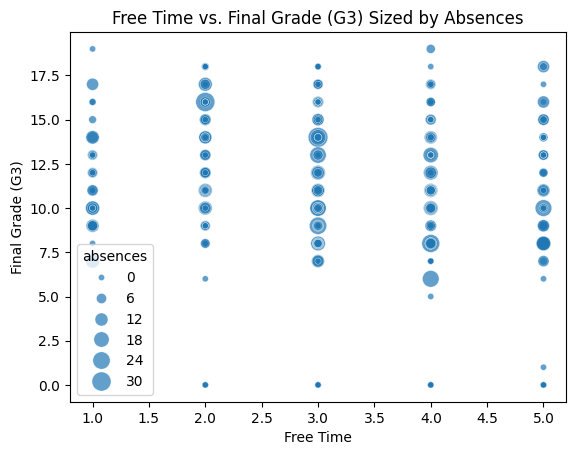

In [298]:
sns.scatterplot(data=df, x='freetime', y='G3', size='absences', sizes=(20, 200), alpha=0.7)
plt.title('Free Time vs. Final Grade (G3) Sized by Absences')
plt.xlabel('Free Time')
plt.ylabel('Final Grade (G3)')
plt.show()


*8. Question*: Is there a gender disparity in participation in extracurricular activities?  
*Plot: **Pie Chart*** (Activity participation split by sex).  
*Insight*: Explore gender-based differences in engagement outside academics.  


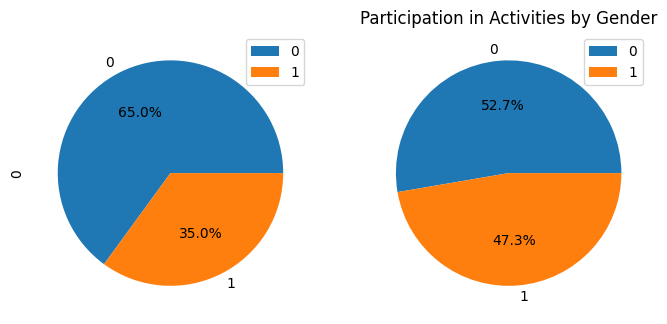

In [299]:
df.groupby('sex')['activities'].value_counts().unstack().plot.pie(subplots=True, autopct='%1.1f%%', figsize=(8, 5))
plt.title('Participation in Activities by Gender')
plt.ylabel('')
plt.show()


*9. Question*: Do romantic relationships (romantic) correlate with lower grades?  
*Plot: **Box Plot*** (G3 distribution by romantic status).  
*Insight*: Examine if relationships distract from academic focus.  


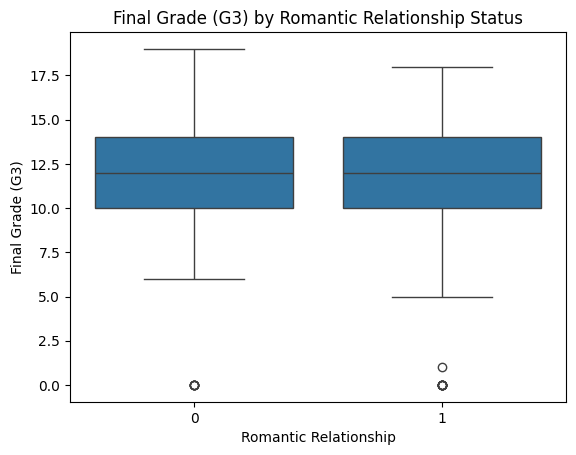

In [300]:
sns.boxplot(data=df, x='romantic', y='G3')
plt.title('Final Grade (G3) by Romantic Relationship Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Final Grade (G3)')
plt.show()


*10. Question*: How do absences affect final grades across different schools?  
*Plot: **Regression Line Plot*** (Absences vs. G3, faceted by school).  
*Insight*: Quantify the impact of attendance on performance and compare across institutions.  


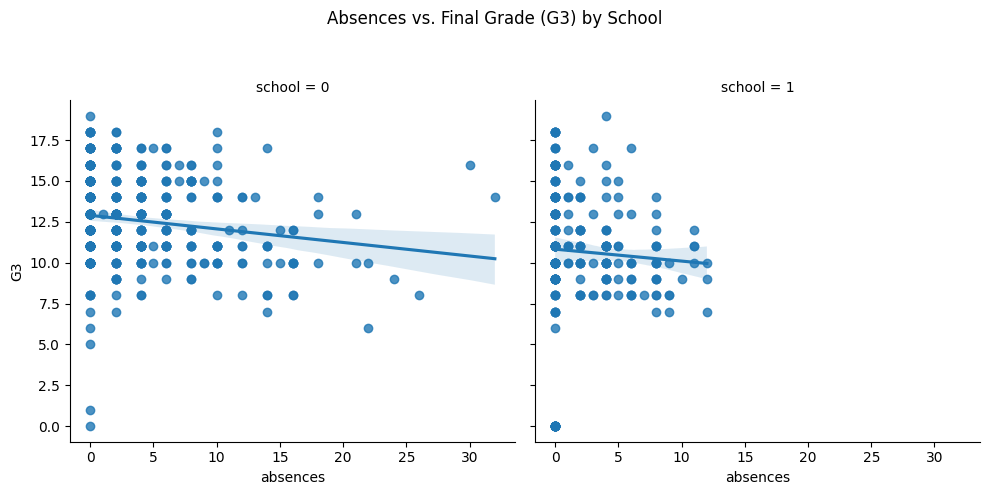

In [301]:
sns.lmplot(data=df, x='absences', y='G3', col='school', height=5, aspect=1)
plt.subplots_adjust(top=0.8)
plt.suptitle('Absences vs. Final Grade (G3) by School')
plt.show()


**Relationship Model Prediction**

Logistic Regression

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
X = df.drop(columns=['romantic'])
y = df['romantic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_log = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", log_accuracy)
print(classification_report(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))


Logistic Regression Accuracy: 0.5615384615384615
              precision    recall  f1-score   support

           0       0.61      0.80      0.70        81
           1       0.33      0.16      0.22        49

    accuracy                           0.56       130
   macro avg       0.47      0.48      0.46       130
weighted avg       0.51      0.56      0.52       130

[[65 16]
 [41  8]]


Random Forest Classifier

In [303]:
from sklearn.ensemble import RandomForestClassifier

# Model training
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 0.5461538461538461
              precision    recall  f1-score   support

           0       0.60      0.84      0.70        81
           1       0.19      0.06      0.09        49

    accuracy                           0.55       130
   macro avg       0.39      0.45      0.39       130
weighted avg       0.44      0.55      0.47       130

[[68 13]
 [46  3]]


Xgboost Classifier

In [304]:
from xgboost import XGBClassifier

# Model training
xgb_model = XGBClassifier( eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))



XGBoost Accuracy: 0.5846153846153846
              precision    recall  f1-score   support

           0       0.66      0.69      0.67        81
           1       0.44      0.41      0.43        49

    accuracy                           0.58       130
   macro avg       0.55      0.55      0.55       130
weighted avg       0.58      0.58      0.58       130

[[56 25]
 [29 20]]


1. Visualizing Decision Boundaries (Logistic, RF, XGBoost)

C:\Users\madha\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [01:43:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\madha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


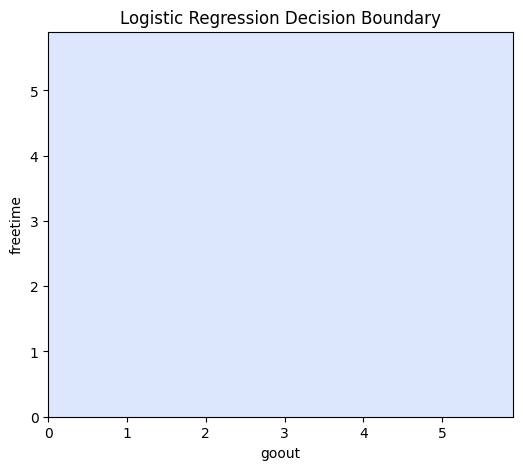

C:\Users\madha\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


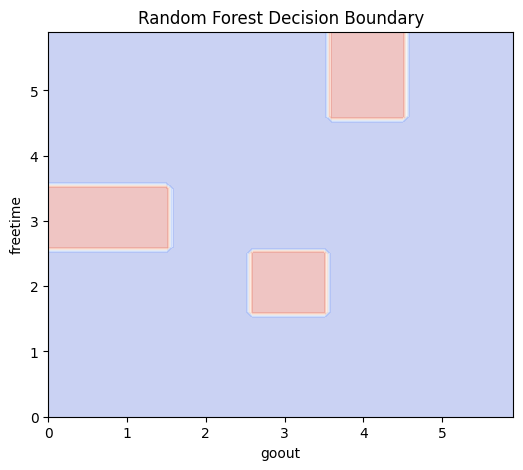

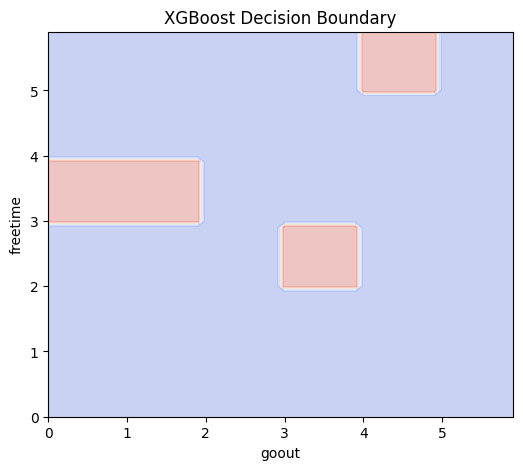

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

#
feature1 = 'goout'
feature2 = 'freetime'


X = df[[feature1, feature2]]
y = df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


log_clf = LogisticRegression().fit(X_train, y_train)
rf_clf = RandomForestClassifier().fit(X_train, y_train)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)


def plot_boundary(model, title):
    x_min, x_max = X[feature1].min() - 1, X[feature1].max() + 1
    y_min, y_max = X[feature2].min() - 1, X[feature2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[feature1], X[feature2], c=y.map({'no':0, 'yes':1}), cmap='coolwarm', edgecolors='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(title)
    plt.show()

plot_boundary(log_clf, "Logistic Regression Decision Boundary")
plot_boundary(rf_clf, "Random Forest Decision Boundary")
plot_boundary(xgb_clf, "XGBoost Decision Boundary")


2. SHAP: Global Feature Importance (XGBoost)

In [2]:
import shap


X_full = df.drop(columns=['romantic'])
y_full = df['romantic']
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_test)


shap.plots.bar(shap_values)


ModuleNotFoundError: No module named 'shap'

3. SHAP: Local Explanations for Two Students

In [ ]:

y_pred = xgb_model.predict(X_test)
X_test = X_test.reset_index(drop=True)


yes_index = X_test[y_pred == 1].index[0]
no_index = X_test[y_pred == 0].index[0]


print("Local explanation for student predicted YES:")
shap.plots.waterfall(shap_values[yes_index])


print("Local explanation for student predicted NO:")
shap.plots.waterfall(shap_values[no_index])


ValueError: feature_names mismatch: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences', 'G1', 'G2', 'G3', 'Feature_1', 'Feature_2', 'Feature_3', 'codes'] ['goout', 'freetime']
expected activities, famsize, famsup, guardian, famrel, school, internet, absences, G3, nursery, failures, traveltime, address, health, Pstatus, Mjob, G2, sex, schoolsup, Medu, reason, Fedu, Feature_2, Dalc, Feature_3, G1, higher, codes, Feature_1, paid, Fjob in input data